In [ ]:
!pip install mlxtend==0.22.0
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yf1Q7-LLZN3rmeBMRWHFh2LFOlL4N7ur' -O dataset

--2023-08-09 15:15:31--  https://docs.google.com/uc?export=download&id=1Yf1Q7-LLZN3rmeBMRWHFh2LFOlL4N7ur
Resolving docs.google.com (docs.google.com)... 142.250.128.101, 142.250.128.139, 142.250.128.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/003bg1ttmkoafuvg7i6eph7bn5n6b7f1/1691594100000/14168760229178069764/*/1Yf1Q7-LLZN3rmeBMRWHFh2LFOlL4N7ur?e=download&uuid=b9b8b94e-b97c-4eb3-81fa-35f952aa59eb [following]
--2023-08-09 15:15:31--  https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/003bg1ttmkoafuvg7i6eph7bn5n6b7f1/1691594100000/14168760229178069764/*/1Yf1Q7-LLZN3rmeBMRWHFh2LFOlL4N7ur?e=download&uuid=b9b8b94e-b97c-4eb3-81fa-35f952aa59eb
Resolving doc-0g-0g-docs.googleusercontent.com (doc-0g-0g-docs.googleusercontent.com)... 142.250.128.132, 2607:

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('dataset', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
baskets = []
purchase_count = {}
for basket in dataset.to_numpy():
  items = []
  for item in basket:
    if item is np.nan: continue
    items.append(item)
    if item in purchase_count:
      purchase_count[item] += 1
    else: purchase_count[item] = 1

  baskets.append(items)

print(len(baskets))
purchase_count = dict(sorted(purchase_count.items(), key=lambda item: item[1], reverse=True))

7501


## Peringkat Teratas Barang

Text(0.5, 0, 'Sold count')

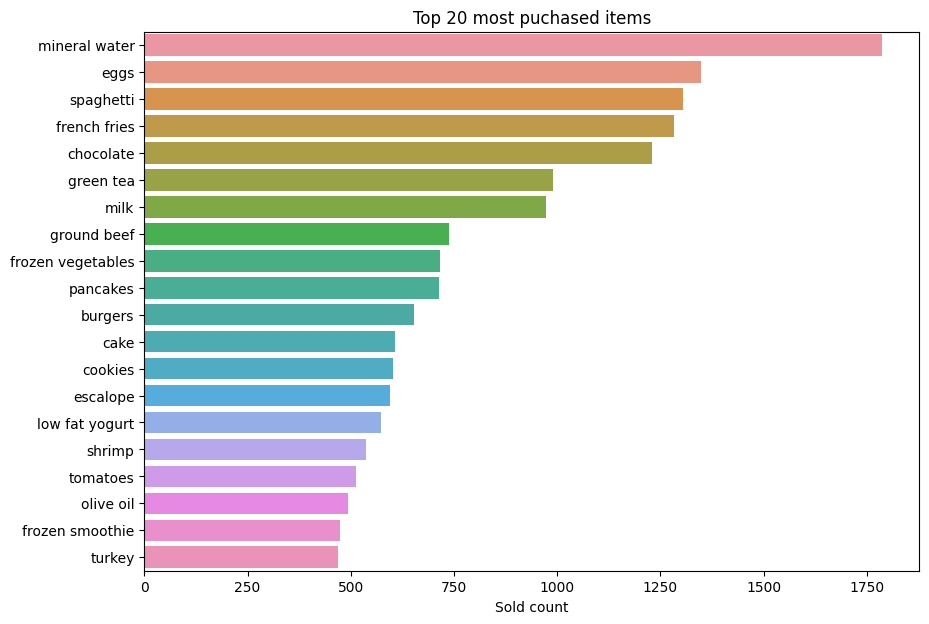

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

all_items = list(purchase_count.keys())
top_purchase_count = 20
top_items = all_items[:top_purchase_count]

plt.figure(figsize=(10,7))
sns.barplot(y=top_items, x=[purchase_count[item] for item in top_items])
plt.title('Top %d most puchased items' % top_purchase_count)
plt.xlabel('Sold count')

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(baskets).transform(baskets)
df = pd.DataFrame(oht_ary, columns=te.columns_)
df.shape

(7501, 120)

In [ ]:
def rule_heatmap(rule, metric, resize=True):
  # if resize: plt.figure().set_figheight(25)
  metric_map = rule.copy()
  cols = ['consequents', 'antecedents'][::-1]
  metric_map[cols] = metric_map[cols].applymap(lambda vals: ', '.join(vals))
  sns.heatmap(metric_map.pivot(*cols, metric))
  plt.ylabel('Current purchased item')
  plt.xlabel('Likely to purchase item')
  plt.title('Heat map correlation of buying tendency')
  # plt.tight_layout()

In [ ]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

## Apriori

In [ ]:
%%time
apriori_support = apriori(df, min_support=0.005, use_colnames=True)
apriori_rules = association_rules(apriori_support, metric="confidence", min_threshold=.35)
apriori_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(['support'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 482 ms, sys: 161 ms, total: 642 ms
Wall time: 641 ms


,antecedents,consequents,support,confidence,lift
147,"(olive oil, pancakes)",(spaghetti),0.005066,0.469136,2.694478
131,"(whole wheat rice, milk)",(mineral water),0.005066,0.426966,1.791205
112,"(soup, ground beef)",(mineral water),0.005066,0.520548,2.183798
4,(tomato sauce),(chocolate),0.005066,0.358491,2.187988
111,"(shrimp, ground beef)",(mineral water),0.005066,0.441860,1.853689
...,...,...,...,...,...
19,(pancakes),(mineral water),0.033729,0.354839,1.488616
10,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463
12,(ground beef),(spaghetti),0.039195,0.398915,2.291162
11,(ground beef),(mineral water),0.040928,0.416554,1.747522


In [ ]:
apriori_rules[['support', 'confidence', 'lift']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,confidence,lift
count,148.000000,148.000000,148.000000
mean,0.009225,0.426305,2.054559
std,0.006951,0.056668,0.499951
min,0.005066,0.350282,1.473986
25%,0.005833,0.378680,1.713978
50%,0.006799,0.417058,1.971496
75%,0.009232,0.455783,2.281529
max,0.047994,0.633333,4.700812


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-05426f6589a6>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(metric_map.pivot(*cols, metric))


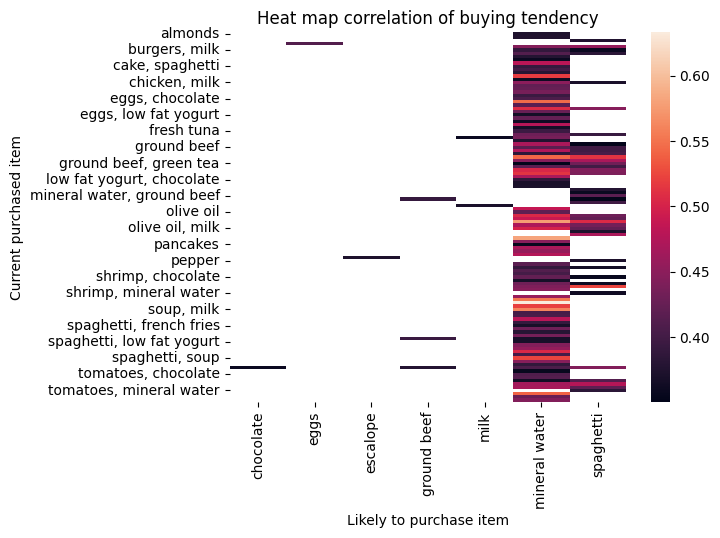

In [ ]:
rule_heatmap(apriori_rules, 'confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


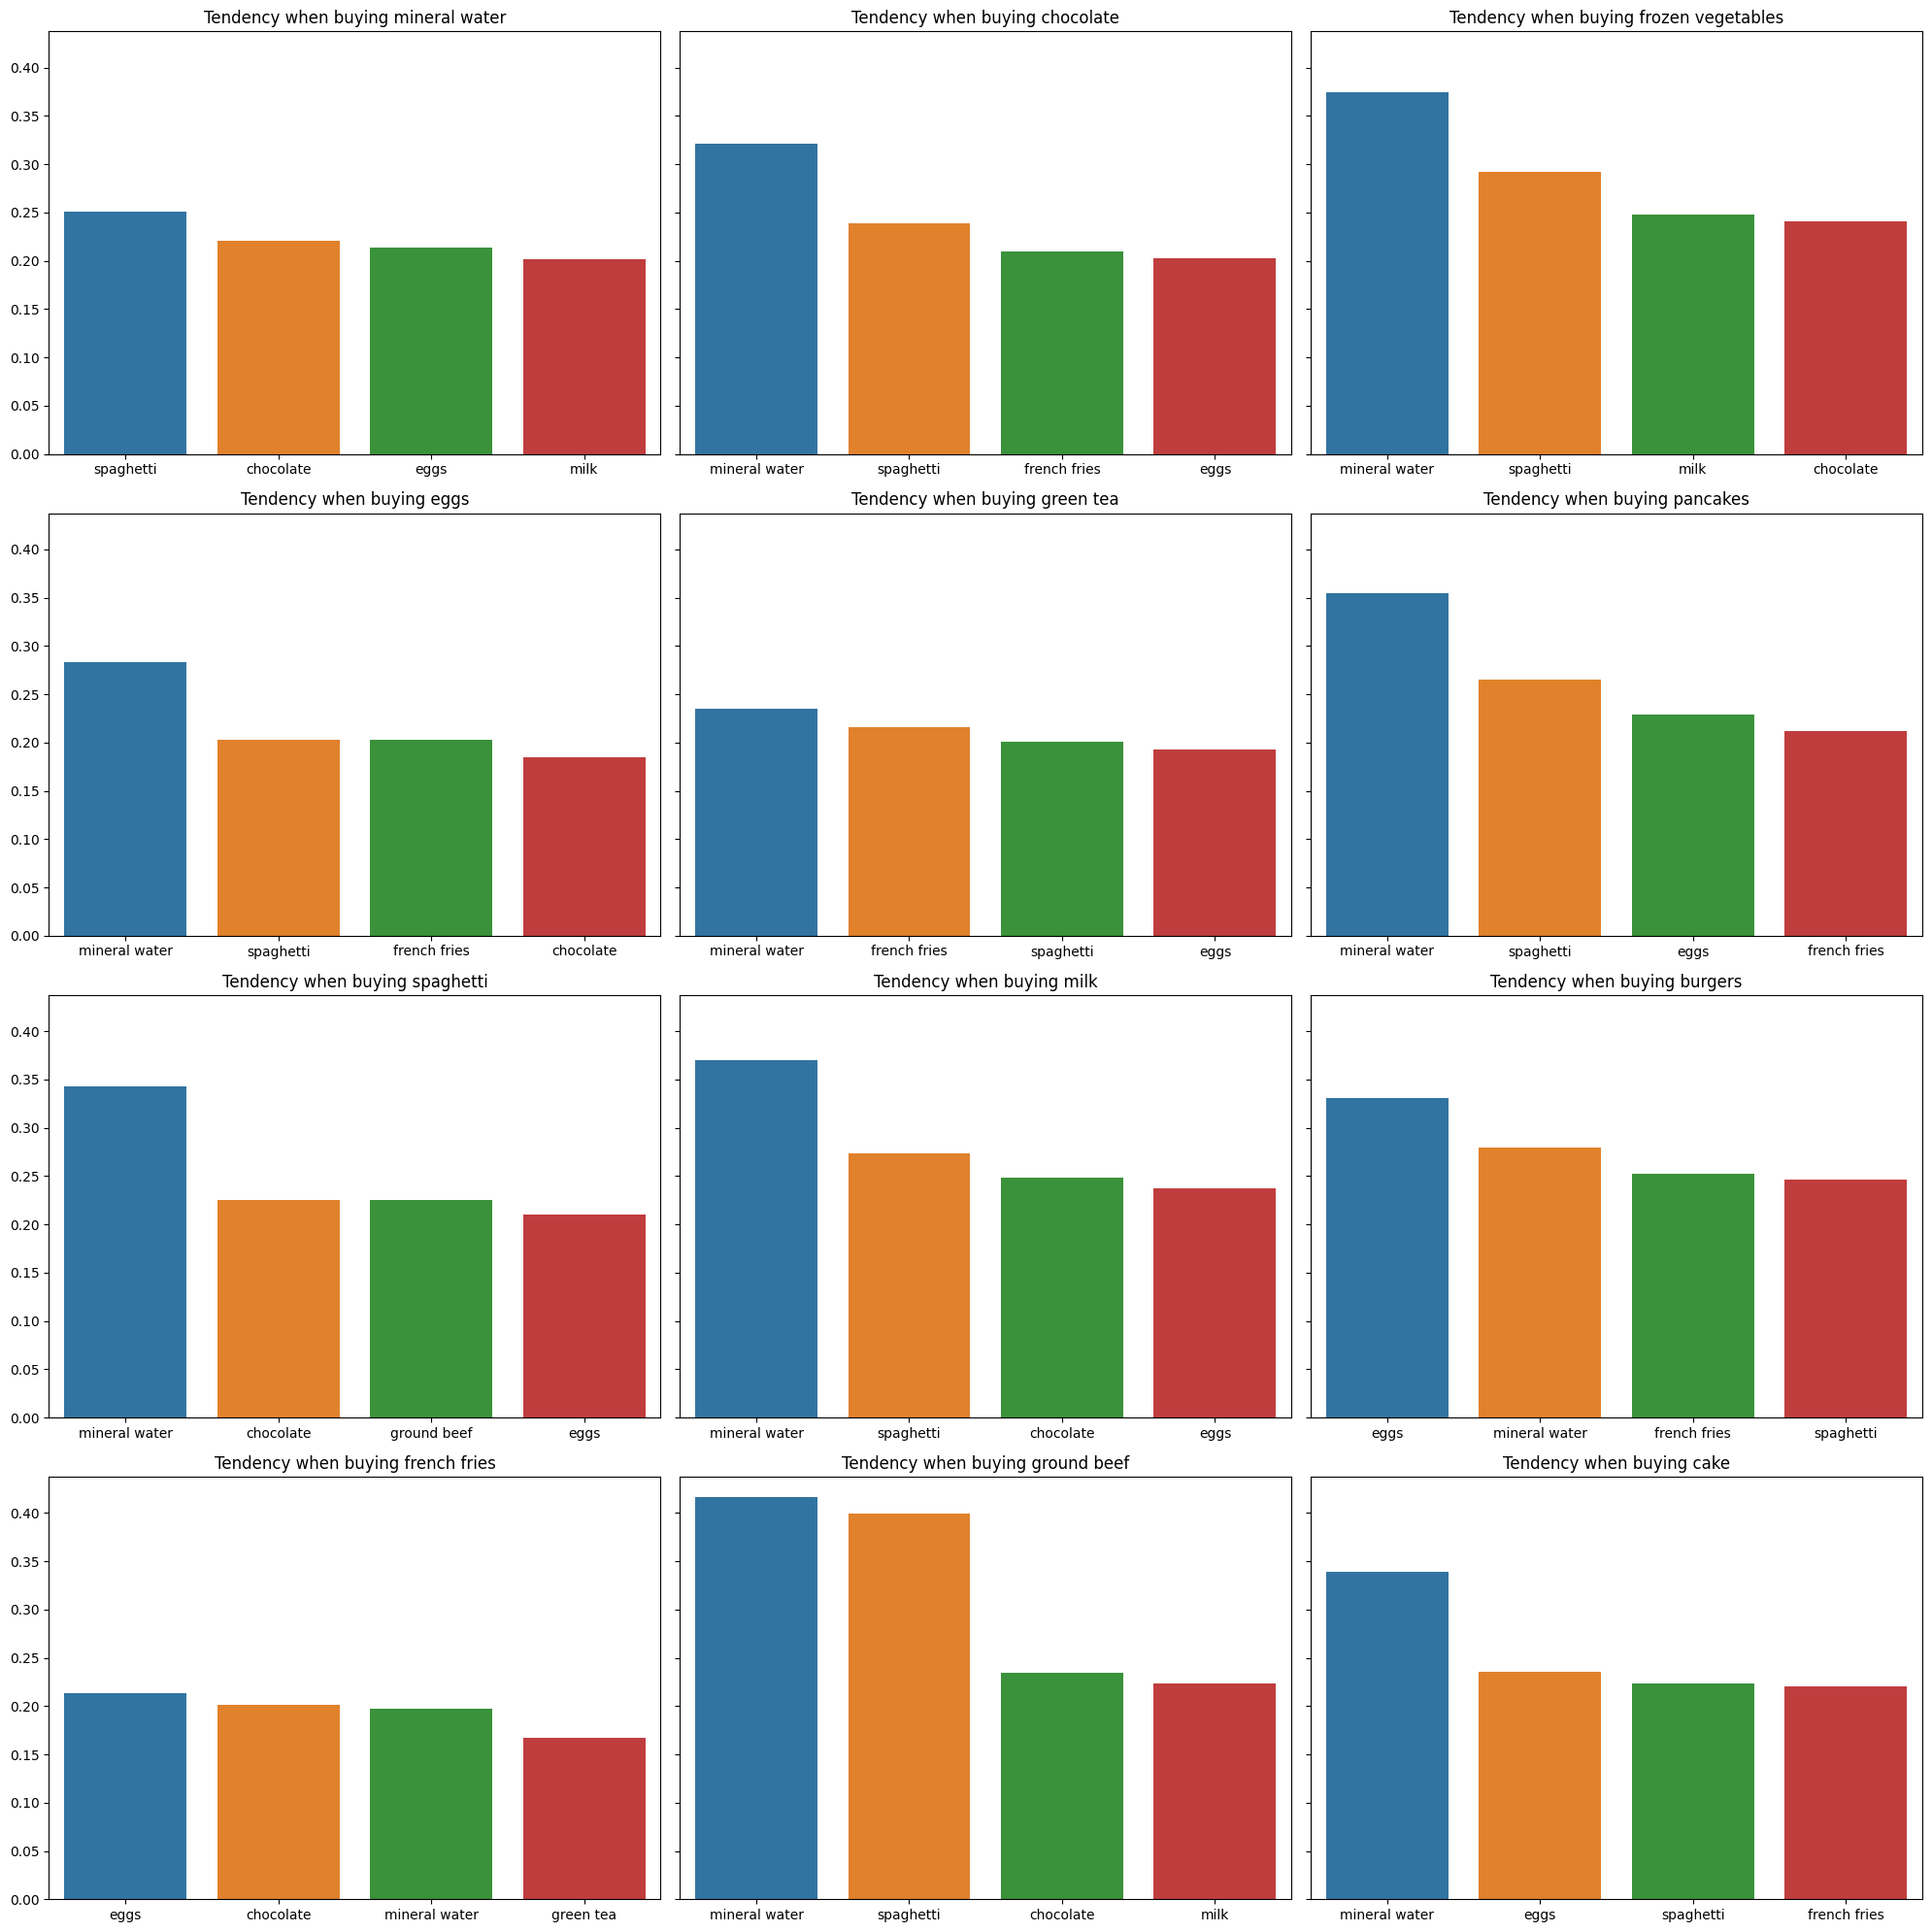

In [ ]:
def get_support(items,algorithm_support):
  support = algorithm_support.loc[algorithm_support['itemsets'] == items]['support']
  return 0 if support.empty else support.values[0]

def basket_confidence(item, target,algorithm_support):
  if item == target: return 0
  item_support = get_support(frozenset({item}),algorithm_support)
  item_target_support = get_support(frozenset({item, target}),algorithm_support)
  return 0 if item_support <= 0 else (item_target_support / item_support)

confidence_map = []
for item in top_items:
  confidence_map.append(
      [basket_confidence(item, target,apriori_support) for target in top_items]
  )

def top_correleation(item, count):
  item_index = top_items.index(item)
  correlation = np.array(confidence_map[item_index])
  ind = np.argpartition(correlation, -count)
  ind = ind[np.argsort(correlation[ind])][::-1][:count]
  res = {}
  for i in ind:
    if correlation[i] <= 0: break
    res[top_items[i]] = correlation[i]
  return res

width, height = 4, 3
fig, axes = plt.subplots(width, height, sharey=True, figsize=(20,20))

for i, item in enumerate(top_items[:(height * width)]):
  correlation = top_correleation(item, 4)
  items = list(correlation.keys())
  confidences = list(correlation.values())
  x = i % width
  y = i // width
  g = sns.barplot(x=items, y=confidences, ax=axes[x, y])
  axes[x, y].set_title('Tendency when buying %s' % item)

plt.tight_layout()

## FP Growth

In [ ]:
%%time
fpgrowth_support = fpgrowth(df, min_support=0.005, use_colnames=True)
fpgrowth_rules = association_rules(fpgrowth_support, metric="confidence", min_threshold=.35)
fpgrowth_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(['support'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 217 ms, sys: 1.3 ms, total: 219 ms
Wall time: 225 ms


,antecedents,consequents,support,confidence,lift
147,(nonfat milk),(mineral water),0.005066,0.487179,2.043811
48,"(milk, whole wheat rice)",(mineral water),0.005066,0.426966,1.791205
56,"(soup, ground beef)",(mineral water),0.005066,0.520548,2.183798
138,(tomato sauce),(chocolate),0.005066,0.358491,2.187988
26,"(pancakes, olive oil)",(spaghetti),0.005066,0.469136,2.694478
...,...,...,...,...,...
102,(pancakes),(mineral water),0.033729,0.354839,1.488616
61,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463
115,(ground beef),(spaghetti),0.039195,0.398915,2.291162
114,(ground beef),(mineral water),0.040928,0.416554,1.747522


In [ ]:
fpgrowth_rules[['support', 'confidence', 'lift']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,confidence,lift
count,148.000000,148.000000,148.000000
mean,0.009225,0.426305,2.054559
std,0.006951,0.056668,0.499951
min,0.005066,0.350282,1.473986
25%,0.005833,0.378680,1.713978
50%,0.006799,0.417058,1.971496
75%,0.009232,0.455783,2.281529
max,0.047994,0.633333,4.700812


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-05426f6589a6>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(metric_map.pivot(*cols, metric))


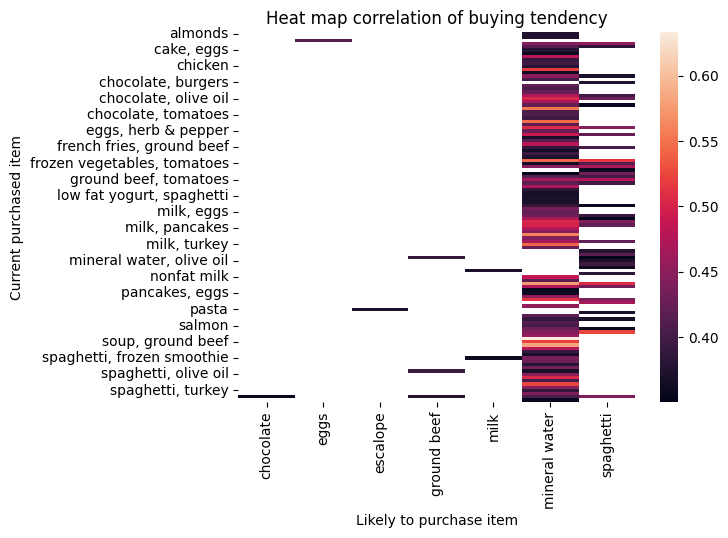

In [ ]:
rule_heatmap(fpgrowth_rules, 'confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


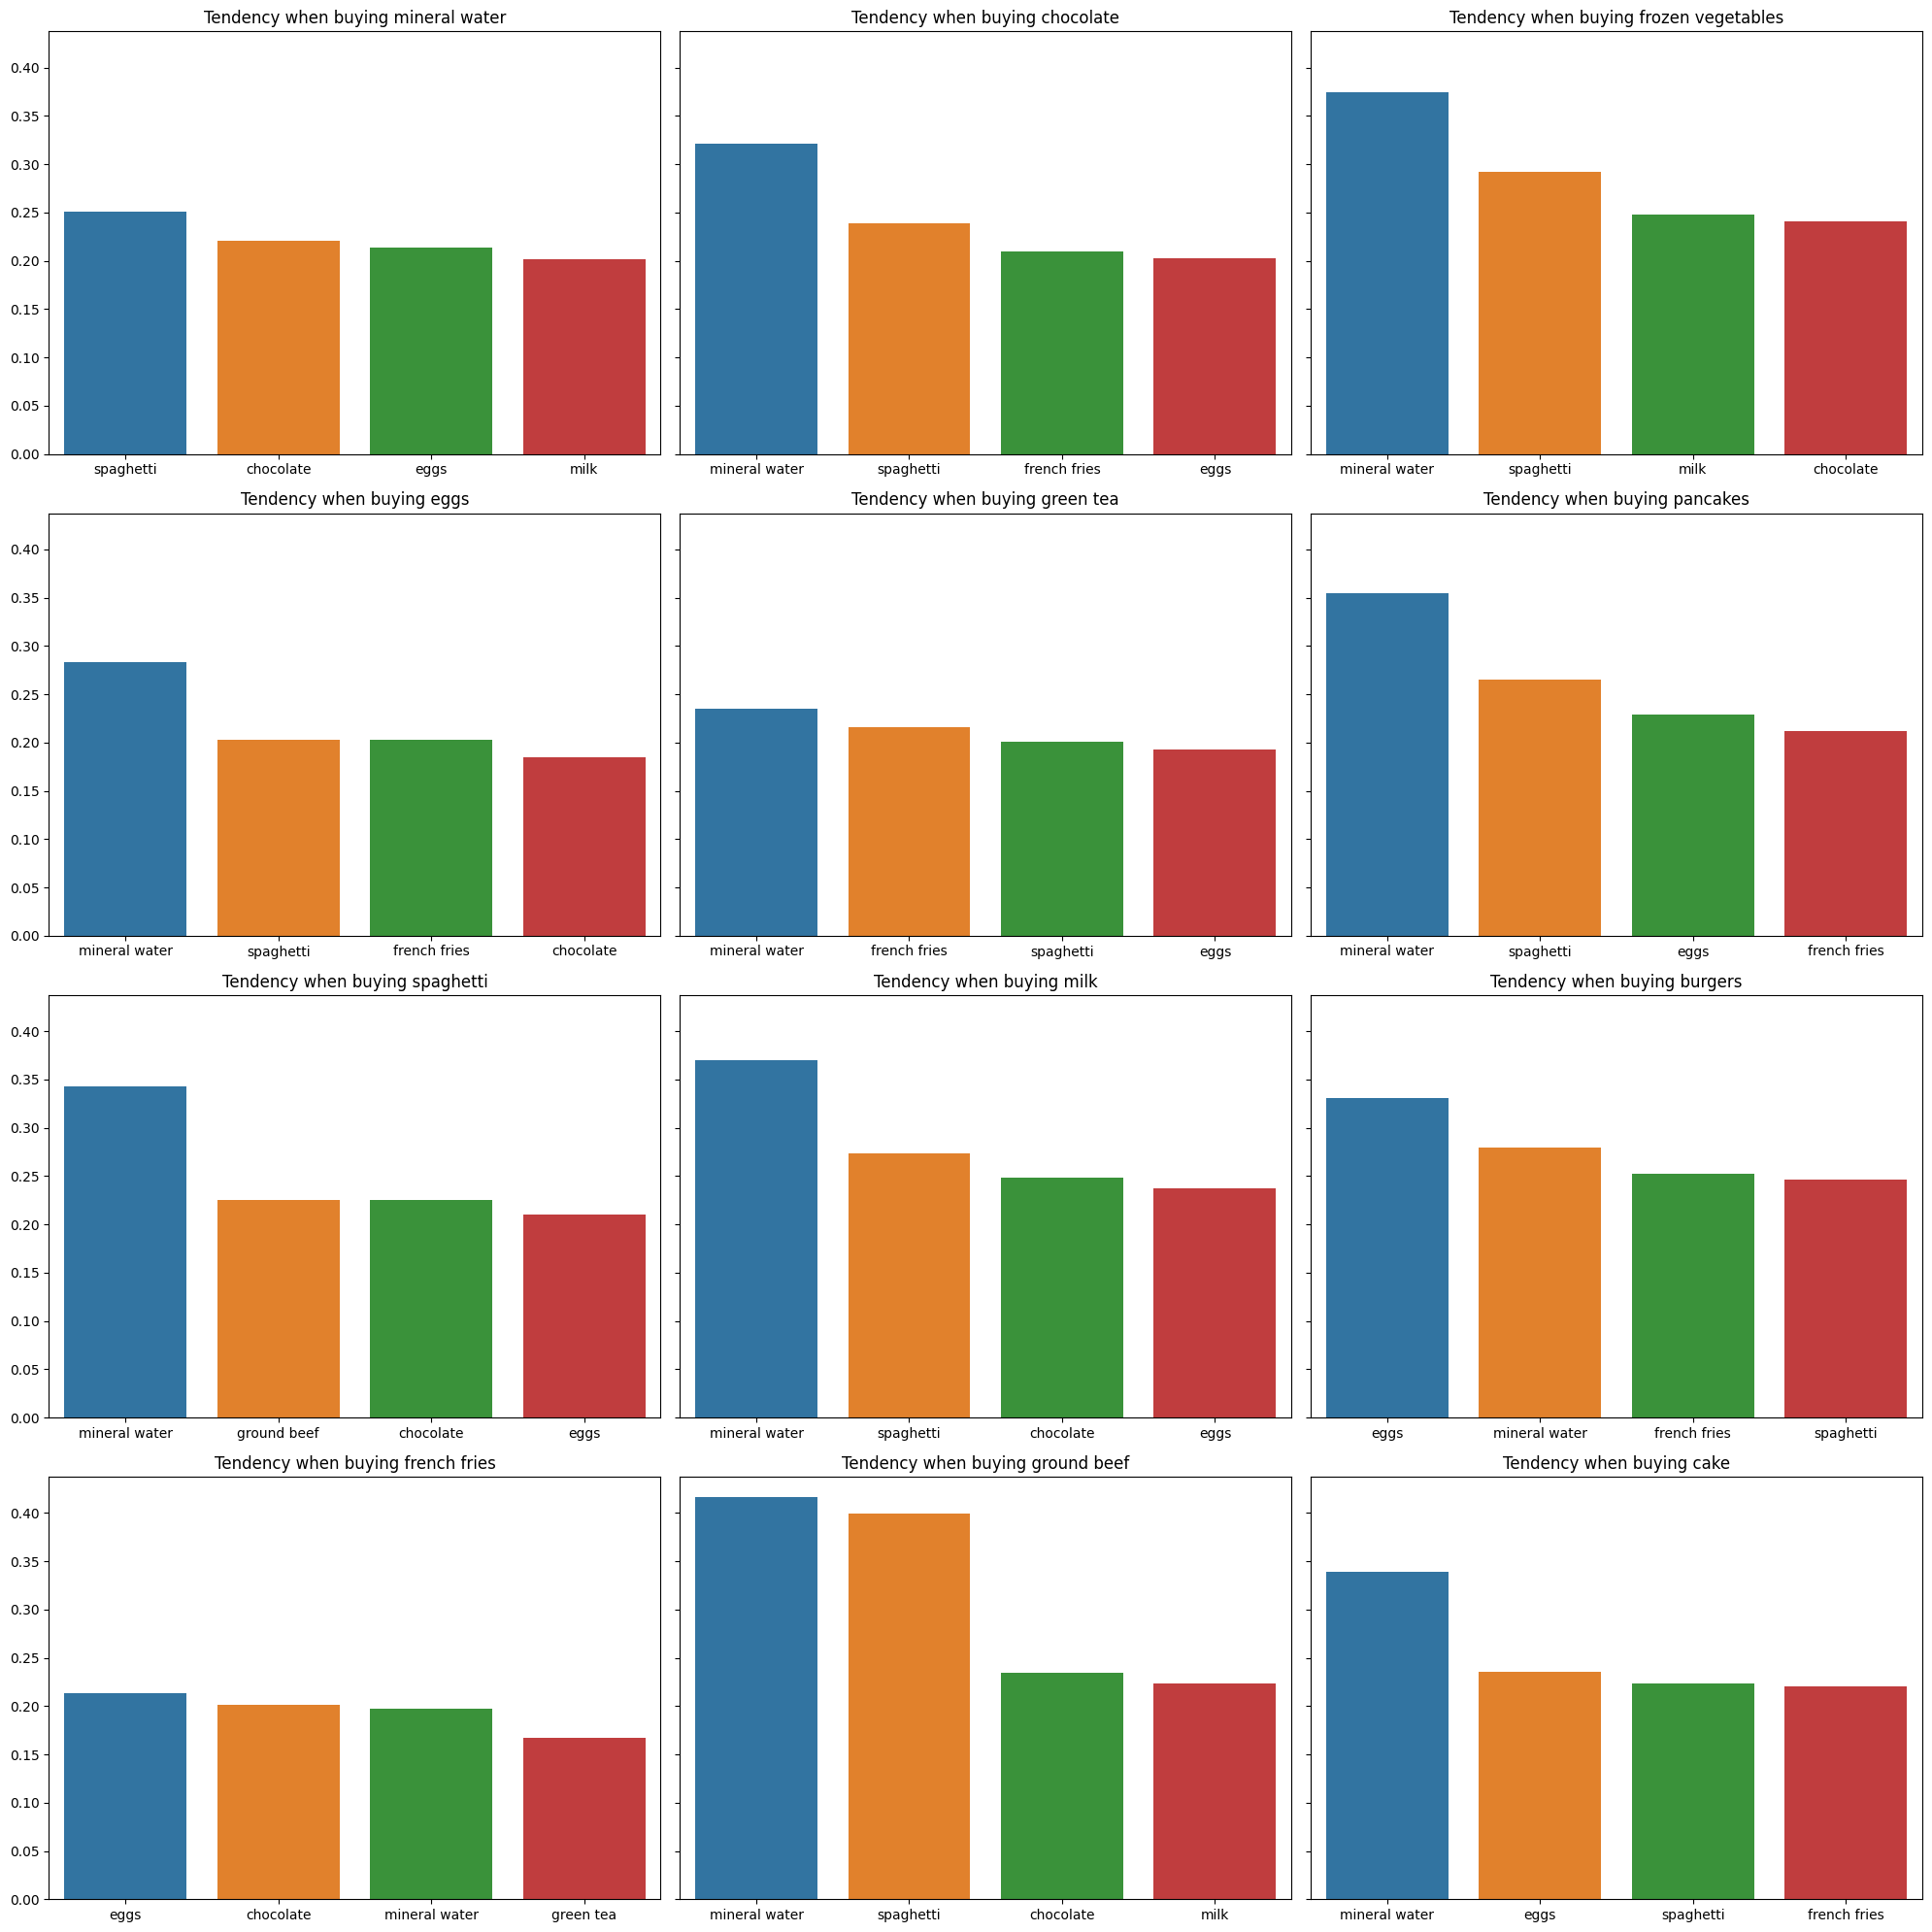

In [ ]:
confidence_map = []
for item in top_items:
  confidence_map.append(
      [basket_confidence(item, target,fpgrowth_support) for target in top_items]
  )

width, height = 4, 3
fig, axes = plt.subplots(width, height, sharey=True, figsize=(20,20))

for i, item in enumerate(top_items[:(height * width)]):
  correlation = top_correleation(item, 4)
  items = list(correlation.keys())
  confidences = list(correlation.values())
  x = i % width
  y = i // width
  g = sns.barplot(x=items, y=confidences, ax=axes[x, y])
  axes[x, y].set_title('Tendency when buying %s' % item)

plt.tight_layout()

## FP Max

In [ ]:
%%time
fpmax_support = fpmax(df, min_support=0.005, use_colnames=True)
fpmax_rules = association_rules(fpmax_support, min_threshold=.01, support_only=True)
fpmax_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(['support'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 351 ms, sys: 3.77 ms, total: 355 ms
Wall time: 363 ms


,antecedents,consequents,support,confidence,lift
183,(spaghetti),"(mineral water, french fries)",0.010132,NaN,NaN
119,(eggs),"(mineral water, ground beef)",0.010132,NaN,NaN
180,"(spaghetti, mineral water)",(french fries),0.010132,NaN,NaN
181,"(spaghetti, french fries)",(mineral water),0.010132,NaN,NaN
182,"(mineral water, french fries)",(spaghetti),0.010132,NaN,NaN
...,...,...,...,...,...
134,"(mineral water, ground beef)",(spaghetti),0.017064,NaN,NaN
133,"(spaghetti, ground beef)",(mineral water),0.017064,NaN,NaN
132,"(spaghetti, mineral water)",(ground beef),0.017064,NaN,NaN
136,(mineral water),"(spaghetti, ground beef)",0.017064,NaN,NaN


In [ ]:
fpmax_rules[['support', 'confidence', 'lift']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,confidence,lift
count,192.000000,0.0,0.0
mean,0.012090,NaN,NaN
std,0.001856,NaN,NaN
min,0.010132,NaN,NaN
25%,0.010665,NaN,NaN
50%,0.011465,NaN,NaN
75%,0.013332,NaN,NaN
max,0.017064,NaN,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-97619210c506>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sddf = ddf.pivot('conf', 'supp', 'count')


supp,0.5%,1.0%,10.0%,5.0%
conf,,,,
10%,1103,320,0,6
20%,597,162,0,6
30%,261,63,0,2
40%,90,18,0,0
50%,20,2,0,0
60%,1,0,0,0


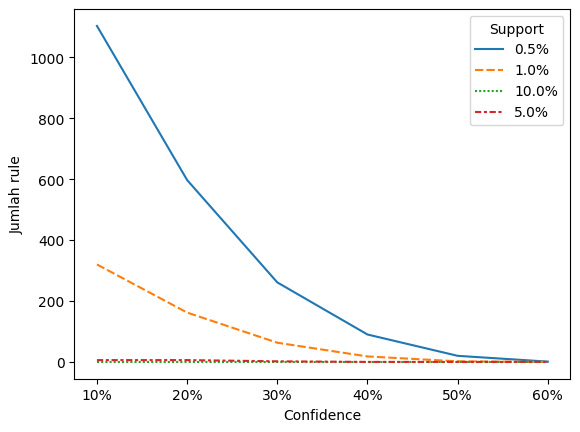

In [ ]:
supp_list = [0.1, 0.05, 0.01, 0.005]
params = np.linspace(0.1, 0.6, 6)
# params = np.linspace(1, 2, 6)

rules_result = []

for supp in supp_list:
  for param in params:
    support = fpgrowth(df, min_support=supp, use_colnames=True)
    rules = association_rules(support, metric="confidence", min_threshold=param)
    rules_result.append((f'{supp*100}%', f'{round(param*100)}%', rules.shape[0]))

ddf = pd.DataFrame(rules_result, columns=['supp', 'conf', 'count'])
sddf = ddf.pivot('conf', 'supp', 'count')
sns.lineplot(data=sddf)
plt.legend(title='Support')
plt.xlabel('Confidence')
plt.ylabel('Jumlah rule')
sddf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-05426f6589a6>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(metric_map.pivot(*cols, metric))


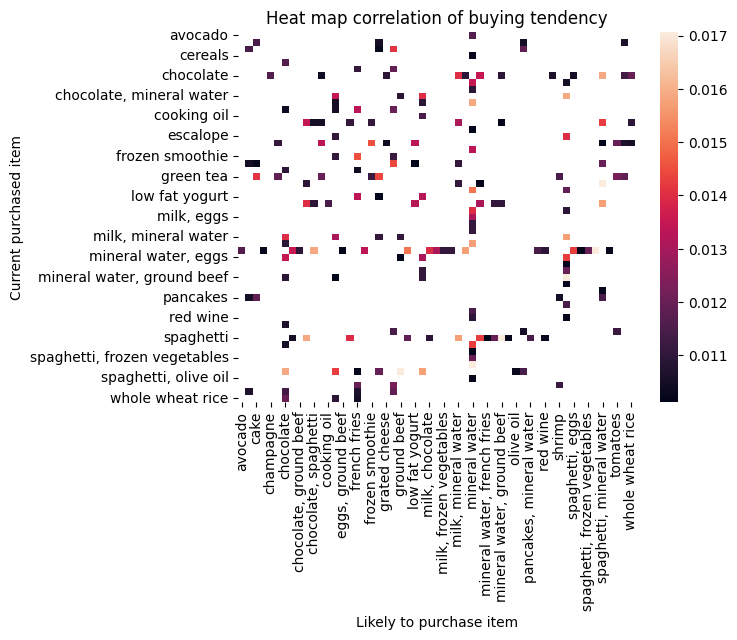

In [ ]:
rule_heatmap(fpmax_rules, 'support', False)